<a href="https://colab.research.google.com/github/danialebrat/Stock_Prediction_khodro_group/blob/main/Codes/Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import mean_squared_error
import gc

In [2]:
# loading the model
model = load_model("/content/drive/MyDrive/Colab Notebooks/Stock Prediction_khodro/Khodro_model.h5")

In [3]:
# plot Path: where to store the results
PLOT_PATH = "/content/drive/MyDrive/Colab Notebooks/Stock Prediction_khodro/Evaluating/"


plot_size = 8

In [4]:
def Plotting(past, future, predicted, file_name, main_path):
     
    """
    plotting previous records (5 records), real future, and the predicted point
    in one plot

    x_ axis: number of days
    y_axis: stock prices
    """    
        
    x_past = range(len(past))
    y_past = past
    
    x_future = range(len(past), len(past)+len(future))
    y_future = future
    
    x_predicted = range(len(past), len(past)+len(predicted))
    y_predicted = predicted
 
       
    # Plotting Trajectory path with stop points   
    plt.title(file_name, fontsize=plot_size*2)
    
    plt.plot(x_past, y_past, color="darkorange", marker="o")
    plt.plot(x_future, y_future, color="green", marker="o")
    plt.plot(x_predicted, y_predicted, color="red", marker="s")
    
    
    plt.xlabel("Day", fontsize=20)
    plt.ylabel("Price", fontsize=20)  
       
    fname = main_path + str(file_name) + ".png"
       
    plt.savefig(fname, dpi=100)  
    plt.close('all')
    
    del x_past, y_past, x_future, y_future, x_predicted, y_predicted
    gc.collect()
    

KeyboardInterrupt: ignored

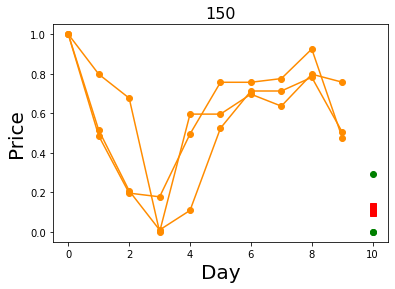

In [5]:
if __name__ == "__main__":
    
    # loading X_test and Y_test
    X = np.load("/content/drive/MyDrive/Colab Notebooks/Stock Prediction_khodro/x_test_stock.npy")
    Y = np.load("/content/drive/MyDrive/Colab Notebooks/Stock Prediction_khodro/y_test_stock.npy")
    
    predict = model.predict(X)
    index = 0
    
    for i in range(len(X)):
        
        x = X[i]
        y = Y[i]      
        predicted = predict[i]
        
        Plotting(x, y, predicted, index, main_path = PLOT_PATH)
        index += 1
        
    
    
    

    
    
    